In [31]:
import pandas as pd
import numpy as np

## para missing values
import missingno as msno

In [32]:
import os

# Define el path
path = r'C:\Users\ferma\OneDrive\Documentos\UNLP-ME\ML_UNLP'

# Cambiar el directorio de trabajo
os.chdir(path)

In [33]:

# Ruta para la carpeta interna que contiene los archivos CSV
path_data = path + '\\stores'

# Ejemplo de uso
data_file = path_data + '\\page_1.csv'

In [34]:
data_file

'C:\\Users\\ferma\\OneDrive\\Documentos\\UNLP-ME\\ML_UNLP\\stores\\page_1.csv'

In [35]:
# Crear una lista vacía para almacenar los DataFrames
dfs = []

# Leer archivos page_1.csv a page_10.csv, reemplazar 'NA' por np.nan y concatenarlos
for i in range(1, 11):
    # Construir la ruta del archivo
    data_file = path_data + f'\page_{i}.csv'

    # Leer el archivo CSV
    try:
        df = pd.read_csv(data_file)

        # Reemplazar 'NA' por np.nan
        df.replace('NA', np.nan, inplace=True)

        # Agregar el DataFrame a la lista
        dfs.append(df)
        print(f"Archivo page_{i}.csv cargado y procesado correctamente.")
    except FileNotFoundError:
        print(f"El archivo page_{i}.csv no se encontró en {data_file}")
    except Exception as e:
        print(f"Error al leer el archivo page_{i}.csv: {e}")

# Concatenar todos los DataFrames en uno solo
if dfs:
  #combined
    df = pd.concat(dfs, ignore_index=True)
    print("Archivos concatenados correctamente.")
    # Aquí puedes realizar operaciones adicionales con 'combined_df'
else:
    print("No se pudieron cargar archivos para concatenar.")

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15656\4215115285.py:7: SyntaxWarning: invalid escape sequence '\p'
  data_file = path_data + f'\page_{i}.csv'


Archivo page_1.csv cargado y procesado correctamente.
Archivo page_2.csv cargado y procesado correctamente.
Archivo page_3.csv cargado y procesado correctamente.
Archivo page_4.csv cargado y procesado correctamente.
Archivo page_5.csv cargado y procesado correctamente.
Archivo page_6.csv cargado y procesado correctamente.
Archivo page_7.csv cargado y procesado correctamente.
Archivo page_8.csv cargado y procesado correctamente.
Archivo page_9.csv cargado y procesado correctamente.
Archivo page_10.csv cargado y procesado correctamente.
Archivos concatenados correctamente.


In [36]:
df.shape

(32177, 178)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32177 entries, 0 to 32176
Columns: 178 entries, Unnamed: 0 to y_total_m_ha
dtypes: float64(158), int64(19), object(1)
memory usage: 43.7+ MB


#### Separar columnas numéricas y categóricas

In [38]:
# Paso 2: Separar columnas numéricas y categóricas
numerical_cols = df.select_dtypes(include=[np.number])
categorical_cols = df.select_dtypes(exclude=[np.number])
categorical_cols

,dominio
0,BOGOTA
1,BOGOTA
2,BOGOTA
3,BOGOTA
4,BOGOTA
...,...
32172,BOGOTA
32173,BOGOTA
32174,BOGOTA
32175,BOGOTA


#### si no tiene variabilidad, se puede dropear


In [39]:
df.dominio.unique()

array(['BOGOTA'], dtype=object)

In [40]:
df.describe()

,Unnamed: 0,directorio,secuencia_p,orden,clase,mes,estrato1,sex,age,p6050,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
count,32177.000000,3.217700e+04,32177.000000,32177.000000,32177.0,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,...,3.990000e+02,3.500000e+01,4.610000e+02,9964.000000,4.904000e+03,0.0,4.904000e+03,4904.000000,1.486800e+04,14868.000000
mean,1609.350033,4.655587e+06,1.012773,2.411039,1.0,6.404606,2.519377,0.479069,34.398701,2.530161,...,3.096817e+06,4.471214e+05,6.887619e+05,8779.402750,1.350620e+06,NaN,1.350620e+06,8073.790598,1.608661e+06,8504.196798
std,928.884426,8.256284e+04,0.126114,1.433830,0.0,3.398596,1.004623,0.499569,20.880512,1.654212,...,1.031732e+07,7.379406e+05,1.121704e+06,12850.070292,2.460600e+06,NaN,2.460600e+06,15792.567872,2.425243e+06,13828.288656
min,1.000000,4.514331e+06,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,6.000000e+03,48.611111,8.400000e+01,NaN,8.400000e+01,0.471528,8.400000e+01,0.471528
25%,805.000000,4.584531e+06,1.000000,1.000000,1.0,3.000000,2.000000,0.000000,18.000000,1.000000,...,0.000000e+00,0.000000e+00,1.200000e+05,4212.962891,4.800000e+05,NaN,4.800000e+05,2625.000000,7.974024e+05,3754.178284
50%,1609.000000,4.655207e+06,1.000000,2.000000,1.0,6.000000,2.000000,0.000000,32.000000,2.000000,...,6.000000e+05,7.000000e+04,3.000000e+05,5033.156982,8.000000e+05,NaN,8.000000e+05,4131.944336,9.890246e+05,4821.993652
75%,2414.000000,4.728957e+06,1.000000,3.000000,1.0,9.000000,3.000000,1.000000,50.000000,3.000000,...,2.000000e+06,5.950000e+05,7.000000e+05,7991.291992,1.500000e+06,NaN,1.500000e+06,7777.777832,1.545708e+06,7852.961548
max,3218.000000,4.804455e+06,4.000000,14.000000,1.0,12.000000,6.000000,1.000000,106.000000,9.000000,...,1.300000e+08,3.125000e+06,1.000000e+07,350583.343750,7.000000e+07,NaN,7.000000e+07,340277.781250,7.000000e+07,350583.343750


In [41]:
# Paso 3: Estadísticas descriptivas
# Estadísticas para numéricas
numerical_summary = numerical_cols.describe().T  # Transpuesta para mejor visualización
numerical_summary['missing_percentage'] = 100 * (numerical_cols.isnull().sum() / len(numerical_cols))

In [42]:
numerical_summary

,count,mean,std,min,25%,50%,75%,max,missing_percentage
Unnamed: 0,32177.0,1.609350e+03,9.288844e+02,1.000000e+00,8.050000e+02,1.609000e+03,2.414000e+03,3.218000e+03,0.000000
directorio,32177.0,4.655587e+06,8.256284e+04,4.514331e+06,4.584531e+06,4.655207e+06,4.728957e+06,4.804455e+06,0.000000
secuencia_p,32177.0,1.012773e+00,1.261139e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,0.000000
orden,32177.0,2.411039e+00,1.433830e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.400000e+01,0.000000
clase,32177.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...
y_gananciaNetaAgro_m,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
y_gananciaIndep_m,4904.0,1.350620e+06,2.460600e+06,8.400000e+01,4.800000e+05,8.000000e+05,1.500000e+06,7.000000e+07,84.759300
y_gananciaIndep_m_hu,4904.0,8.073791e+03,1.579257e+04,4.715278e-01,2.625000e+03,4.131944e+03,7.777778e+03,3.402778e+05,84.759300
y_total_m,14868.0,1.608661e+06,2.425243e+06,8.400000e+01,7.974024e+05,9.890246e+05,1.545708e+06,7.000000e+07,53.793082


#### Missing Values

Variables con más del 90% de Missing Values

<Axes: >

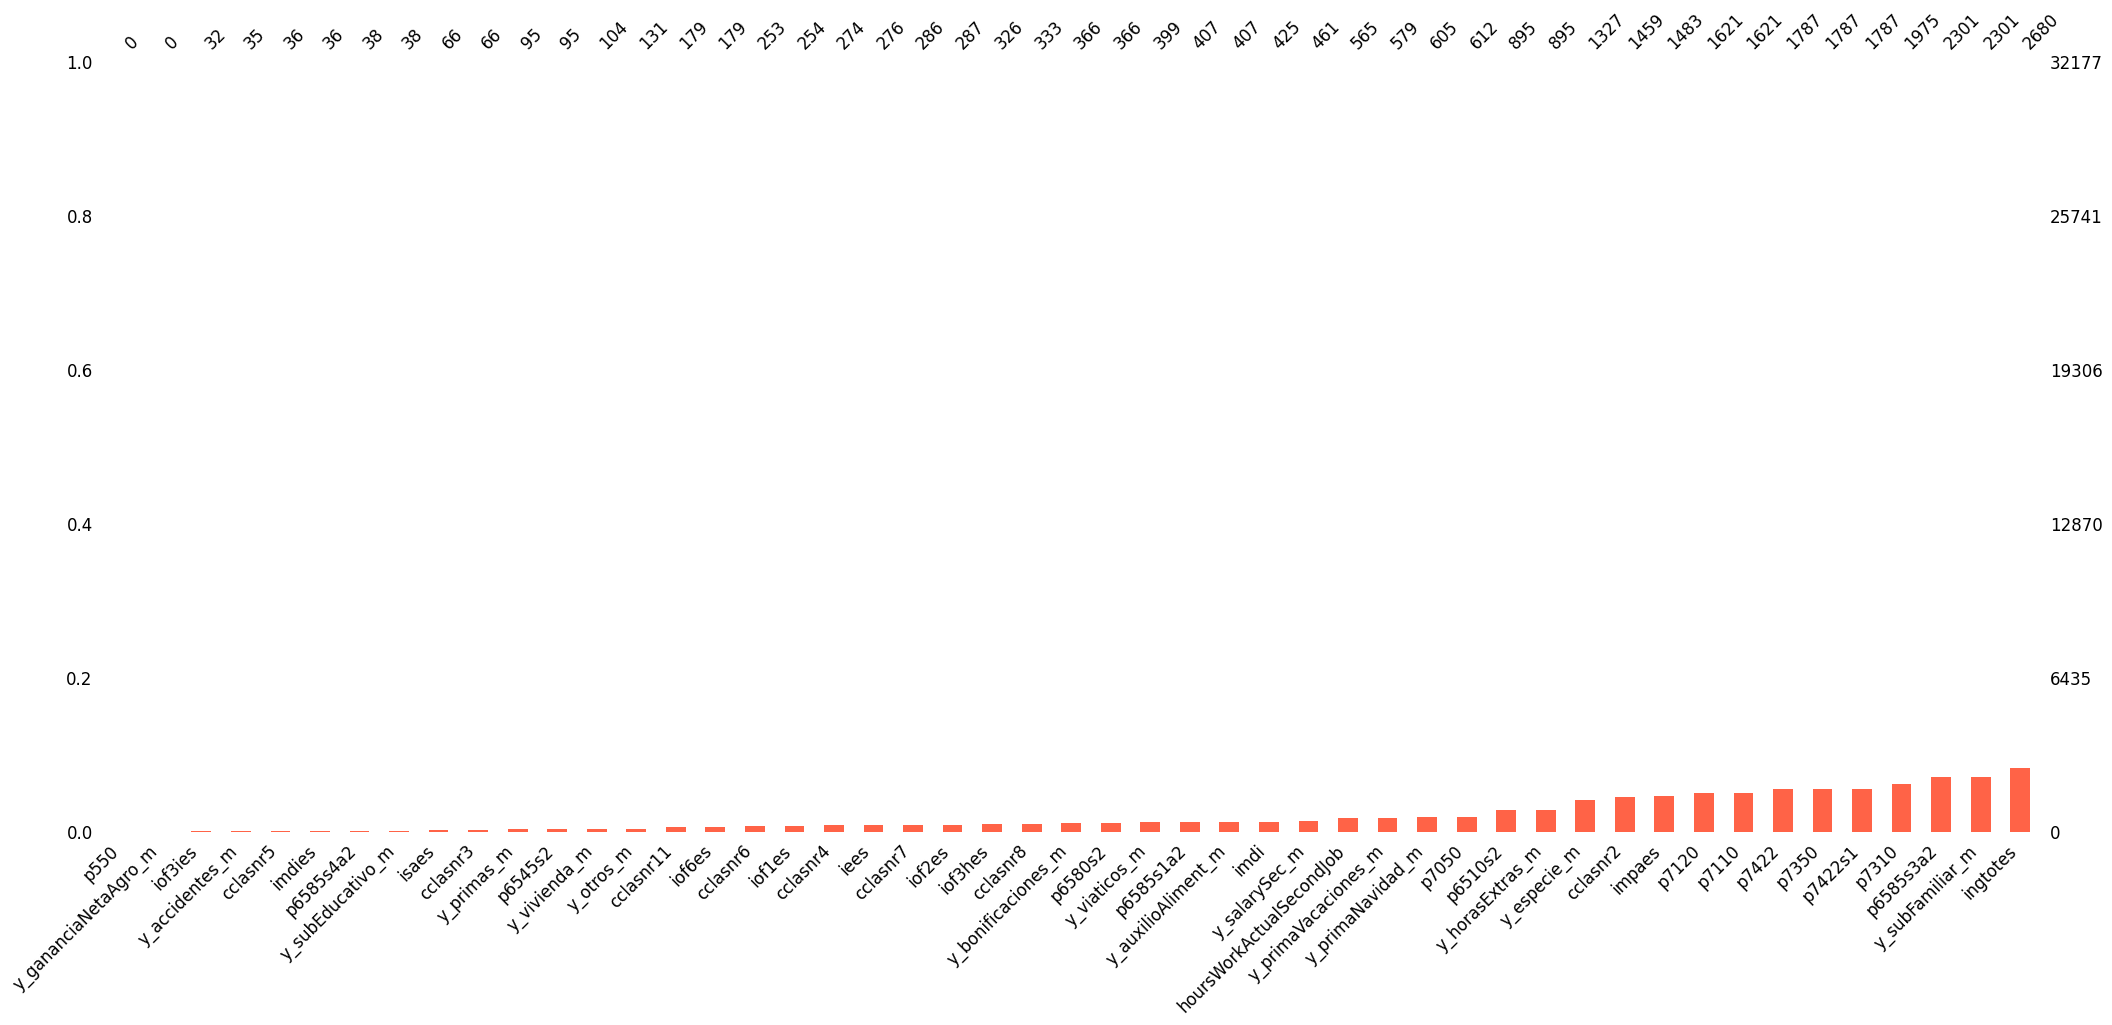

In [43]:
# Calcular el porcentaje de valores nulos por columna
missing_percentage = df.isnull().mean() * 100

# Filtrar las columnas con más del 90% de valores faltantes
columns_above_90_missing = missing_percentage[missing_percentage > 90].index.tolist()

# Crear un nuevo DataFrame solo con las columnas que tienen más del 90% de valores nulos
df_high_missing = df[columns_above_90_missing]

# Visualizar el mapa de barras para estas columnas con más del 90% de valores faltantes
msno.bar(df_high_missing, sort="ascending", fontsize=12, color='tomato')

In [44]:
df.p550.unique()

array([nan])

#### 1. Identificar columnas con pocos valores únicos (posiblemente codificadas)

Una buena indicación de que una columna está codificada es que tiene pocos valores únicos (es decir, toma un número limitado de categorías). Esto es común en variables categóricas que fueron codificadas numéricamente.

In [45]:
# Contar los valores únicos por columna
unique_counts = df.nunique()

# Definir un umbral para identificar las columnas con pocos valores únicos
threshold = 10  # Puedes ajustar este umbral según el contexto de tus datos
codified_columns = unique_counts[unique_counts <= threshold].index

print(f"Columnas codificadas: {codified_columns}")

Columnas codificadas: Index(['secuencia_p', 'clase', 'dominio', 'estrato1', 'sex', 'p6050', 'p6090',
       'p6100', 'p6210', 'p6240', 'relab', 'p6510', 'p6510s2', 'p6545',
       'p6545s2', 'p6580', 'p6580s2', 'p6585s1', 'p6585s1a2', 'p6585s2',
       'p6585s2a2', 'p6585s3', 'p6585s3a2', 'p6585s4', 'p6585s4a2', 'p6590',
       'p6600', 'p6610', 'p6620', 'p6630s1', 'p6630s2', 'p6630s3', 'p6630s4',
       'p6630s6', 'p6760', 'p550', 'p6870', 'p6920', 'p7040', 'p7050', 'p7090',
       'p7110', 'p7120', 'p7140s1', 'p7140s2', 'p7150', 'p7160', 'p7310',
       'p7350', 'p7422', 'p7472', 'p7495', 'p7500s1', 'p7500s2', 'p7500s3',
       'p7505', 'p7510s1', 'p7510s2', 'p7510s3', 'p7510s5', 'p7510s6',
       'p7510s7', 'pet', 'ina', 'cclasnr2', 'cclasnr3', 'cclasnr4', 'cclasnr5',
       'cclasnr6', 'cclasnr7', 'cclasnr8', 'cclasnr11', 'depto',
       'maxEducLevel', 'college', 'regSalud', 'cotPension', 'wap', 'ocu',
       'dsi', 'pea', 'inac', 'formal', 'informal', 'cuentaPropia',
       'micr

#### Target?

en búsqueda del Targuet perdido...

Como el objetivo es predecir los salarios, y siendo que los mismos tienen muchos valires diferentes, tendiente a variable continua:

In [46]:
# Contar los valores únicos por columna
unique_counts = df.nunique()

# Definir un umbral para identificar las columnas con muchos valores únicos
threshold = 550  # Ajusta este umbral según el contexto de tus datos

# Seleccionar las columnas que tengan más valores únicos que el umbral
columns_with_many_uniques = unique_counts[unique_counts > threshold].index

print(f"Columnas con más de {threshold} valores únicos: {columns_with_many_uniques}")

Columnas con más de 550 valores únicos: Index(['Unnamed: 0', 'directorio', 'p6500', 'impa', 'ingtotob', 'ingtotes',
       'ingtot', 'fex_c', 'fex_dpto', 'y_salary_m', 'y_salary_m_hu',
       'y_ingLab_m', 'y_ingLab_m_ha', 'y_gananciaIndep_m_hu', 'y_total_m',
       'y_total_m_ha'],
      dtype='object')


In [47]:
# Contar los valores únicos por columna
unique_counts = df.nunique()

# Definir un umbral para identificar las columnas con muchos valores únicos
threshold = 5000  # Ajusta este umbral según el contexto de tus datos

# Seleccionar las columnas que tengan más valores únicos que el umbral
columns_with_many_uniques = unique_counts[unique_counts > threshold].index

# Filtrar el DataFrame para quedarnos solo con las columnas que cumplen la condición
df_filtered = df[columns_with_many_uniques]

# Mostrar el DataFrame filtrado
print(f"El DataFrame filtrado con columnas que tienen más de {threshold} valores únicos:")
print(df_filtered.head())  # Muestra las primeras filas para verificar


El DataFrame filtrado con columnas que tienen más de 5000 valores únicos:
   directorio        ingtot  y_ingLab_m_ha  y_total_m_ha
0     4514331  0.000000e+00            NaN           NaN
1     4514331  1.840833e+06    8404.320312   8404.320312
2     4514332           NaN            NaN           NaN
3     4514332           NaN            NaN           NaN
4     4514332  0.000000e+00            NaN           NaN


##### columnas que comienzan con ing o y_ que dan idea de target

In [48]:
# Filtrar columnas cuyos nombres comienzan con .str, ing o y_
columns_filtered = [col for col in df.columns if col.startswith(('.str', 'ing', 'y_'))]

# Crear un nuevo DataFrame con las columnas filtradas
df_filtered = df[columns_filtered]

# Mostrar el DataFrame filtrado
print("El DataFrame filtrado con columnas que empiezan con .str, ing o y_:")
df_filtered.head()  # Muestra las primeras filas para verificar


El DataFrame filtrado con columnas que empiezan con .str, ing o y_:


,ingtotob,ingtotes,ingtot,y_salary_m,y_salary_m_hu,y_ingLab_m,y_horasExtras_m,y_especie_m,y_vivienda_m,y_otros_m,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
0,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.840833e+06,NaN,1.840833e+06,1300000.0,6740.740723,1620833.25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8404.320312,NaN,NaN,NaN,NaN,1620833.25,8404.320312
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podria ser ingtot

### Filtros

In this problem set, we will focus only on employed individuals older than eighteen (18) years old.

#### Age and employed

In [56]:
import pandas as pd

# Supongamos que df es tu DataFrame original

# Filtrar los individuos empleados y mayores de 18 años
# Asumiendo que las columnas relevantes son 'edad' para la edad y 'empleo' para el estado de empleo
df_filtered = df[(df['age'] > 18) & (df["ocu"] == 1)] 

# Descripción de las variables numéricas
descriptive_stats = df_filtered.describe()

# Para ver las distribuciones de las variables categóricas
categorical_columns = df_filtered.select_dtypes(include=['object']).columns
categorical_stats = df_filtered[categorical_columns].describe()

# Mostrar la descripción estadística
print("Estadísticas descriptivas de variables numéricas:")
print(descriptive_stats)

print("\nEstadísticas descriptivas de variables categóricas:")
print(categorical_stats)

Estadísticas descriptivas de variables numéricas:
         Unnamed: 0    directorio   secuencia_p         orden    clase  \
count  16397.000000  1.639700e+04  16397.000000  16397.000000  16397.0   
mean    1620.236324  4.656795e+06      1.014515      1.911569      1.0   
std      930.622621  8.189005e+04      0.133576      1.207285      0.0   
min        1.000000  4.514331e+06      1.000000      1.000000      1.0   
25%      809.000000  4.588487e+06      1.000000      1.000000      1.0   
50%     1623.000000  4.655288e+06      1.000000      2.000000      1.0   
75%     2428.000000  4.728969e+06      1.000000      2.000000      1.0   
max     3218.000000  4.804455e+06      4.000000     12.000000      1.0   

                mes      estrato1           sex           age         p6050  \
count  16397.000000  16397.000000  16397.000000  16397.000000  16397.000000   
mean       6.453742      2.555102      0.529487     39.625724      2.191376   
std        3.371451      1.012892      0.49914

### Drop Dominio

In [57]:
df.drop(columns=['dominio'], inplace=True)

### Save cleaned data

In [ ]:
path_data+'df_clean.csv'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15656\579324586.py:1: SyntaxWarning: invalid escape sequence '\d'
  path_data+'\df_clean.csv'


'C:\\Users\\ferma\\OneDrive\\Documentos\\UNLP-ME\\ML_UNLP\\stores\\df_clean.csv'

In [ ]:
df.to_csv(path_data +'\df_clean.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15656\1657293850.py:1: SyntaxWarning: invalid escape sequence '\d'
  df.to_csv(path_data+'\df_clean.csv', index=False)
